In [1]:
pip install pandas_market_calendars

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install PyPortfolioOpt


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas_market_calendars

Note: you may need to restart the kernel to use updated packages.


In [108]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from datetime import datetime
import math
import os
import datetime
import xlsxwriter
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
yf.pdr_override()

In [6]:
#Loading the Tickers as Identified by Global X-funds in their Fin-tech ETF
tk = pd.read_csv("/home/rampage/Downloads/global-x-cloud-computing-etf_full-holdings_20191008.csv")
tk.columns = ('Global X Cloud Computing ETF', 'Name', 'Price', 'Shares Held', 'Market Value')
tk = tk.drop([0,1], axis = 0)

In [7]:
companies = pd.DataFrame(tk['Name'].unique()).reset_index()[0]

In [8]:
start = datetime.datetime(2014,1,1)
end = datetime.datetime(2019,7,1)

In [32]:
## Creating a range of dates over which to find the weights
dates = []
date = datetime.datetime(2018,7,16)
for i in range(52):
    date += datetime.timedelta(days = 7) 
    dates.append(date)

In [34]:
## Function to find ticker from company name
import requests
def get_symbol(symbol):
    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(symbol)

    result = requests.get(url).json()

    for x in result['ResultSet']['Result']:
        return x['symbol']

In [35]:
## Remove Unnecessary words from Company titles to find corresponding ticker values
stopwords = {'INC', 'Holding',' CORP', 'INC-CL A', 'INC-CLASS A', 'LTD', 'GRP-ADR','-', 'CLASS', 'A','-CL A','INC-CLASS','CORP','INC-ADR','INC-CL','TRUST', 'CASH' }
title =[]
for i in companies:
    rs = [word for word in i.split() if word not in stopwords]
    rs = ' '.join(rs)
    title.append(rs)

In [36]:
#Get the Tickers from company titles
tickers = []
for i in title:
    com = get_symbol(i)
    tickers.append(com)
    

In [84]:
dataset.to_csv('Close.csv')

In [38]:
def close(tickers, startdate, enddate):
    def data(ticker):
        try:
            return (pdr.get_data_yahoo(ticker, start = startdate, end = enddate)['Adj Close']).rename(ticker)
        except:
            pass
    datas = map(data, tickers)
    return(pd.concat(datas, axis = 1))
dataset = close(tickers, start, end)

In [40]:
#Cleaning data to remove all empty rows
all_data = dataset.dropna(axis = 0, thresh = 3)
all_data = all_data.fillna(method='bfill')

#mean and covariance
mean = expected_returns.mean_historical_return(all_data)
sd = risk_models.sample_cov(all_data)

e_frontier = EfficientFrontier(mean, sd)
raw_weights = e_frontier.max_sharpe()
cleaned_weights = e_frontier.clean_weights()
e_frontier.portfolio_performance(verbose=True)

Expected annual return: 35.9%
Annual volatility: 17.7%
Sharpe Ratio: 1.91


(0.3591426032453895, 0.17711873809902162, 1.9147754036943585)

In [41]:
alldata = []
#Getting Ajd Close for all the tickers
for i in dates:
    end = i
    dataset = close(tickers, start, end)
    all_data = dataset.dropna(axis = 0, thresh = 3)
    all_data = all_data.fillna(method='bfill')

#mean and covariance
    mu = expected_returns.mean_historical_return(all_data)
    S = risk_models.sample_cov(all_data)
    
    ef = EfficientFrontier(mu, S)

    raw_weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()
    
    f_dat = pd.DataFrame(cleaned_weights, index=[0])


    ret = ef.portfolio_performance(verbose=False)[0]
    vol = ef.portfolio_performance(verbose=False)[1]
    sharp = ef.portfolio_performance(verbose=False)[2]

    f_dat['Return'] = ret
    f_dat['Volatility'] = vol
    f_dat['Sharpe.Ratio'] = sharp
    
    alldata.append(f_dat)
    print(f_dat)

      COUP     SHOP  AKAM  XRX      DLR     PAYC  PFPT  PCTY   RP   FOO.BE  \
0  0.00741  0.07554   0.0  0.0  0.08166  0.06789   0.0   0.0  0.0  0.13143   

   ...     TWOU      COR  BNFT  VNET  QTS  IBM  3K1.SG    Return  Volatility  \
0  ...  0.06087  0.17857   0.0   0.0  0.0  0.0     0.0  0.364665     0.14877   

   Sharpe.Ratio  
0      2.316767  

[1 rows x 37 columns]
      COUP     SHOP  AKAM  XRX      DLR     PAYC  PFPT  PCTY   RP   FOO.BE  \
0  0.00365  0.06838   0.0  0.0  0.12621  0.07593   0.0   0.0  0.0  0.13366   

   ...    TWOU      COR  BNFT  VNET  QTS  IBM  3K1.SG    Return  Volatility  \
0  ...  0.0596  0.18188   0.0   0.0  0.0  0.0     0.0  0.358674     0.15277   

   Sharpe.Ratio  
0      2.216882  

[1 rows x 37 columns]
      COUP     SHOP  AKAM  XRX      DLR     PAYC  PFPT  PCTY   RP   FOO.BE  \
0  0.00177  0.06269   0.0  0.0  0.11384  0.08855   0.0   0.0  0.0  0.13774   

   ...     TWOU      COR  BNFT  VNET  QTS  IBM  3K1.SG    Return  Volatility  \
0  ...  0.0

   COUP  PLAN     SHOP  AKAM  XRX      DLR     PAYC  PFPT  PCTY   RP  ...  \
0   0.0   0.0  0.08185   0.0  0.0  0.17319  0.12814   0.0   0.0  0.0  ...   

      TWOU      COR  BNFT  VNET  QTS  IBM  3K1.SG    Return  Volatility  \
0  0.02035  0.13119   0.0   0.0  0.0  0.0     0.0  0.330733    0.171592   

   Sharpe.Ratio  
0       1.81088  

[1 rows x 38 columns]
   COUP  PLAN     SHOP  AKAM  XRX      DLR     PAYC  PFPT  PCTY   RP  ...  \
0   0.0   0.0  0.08046   0.0  0.0  0.16859  0.12569   0.0   0.0  0.0  ...   

      TWOU      COR  BNFT  VNET  QTS  IBM  3K1.SG    Return  Volatility  \
0  0.02497  0.15007   0.0   0.0  0.0  0.0     0.0  0.342475    0.175122   

   Sharpe.Ratio  
0      1.841435  

[1 rows x 38 columns]
   COUP  PLAN     SHOP  AKAM  XRX      DLR     PAYC  PFPT  PCTY   RP  ...  \
0   0.0   0.0  0.08565   0.0  0.0  0.16016  0.12762   0.0   0.0  0.0  ...   

      TWOU     COR  BNFT  VNET  QTS  IBM  3K1.SG    Return  Volatility  \
0  0.02369  0.1722   0.0   0.0  0.0  0.0 

   COUP  PLAN     SHOP  AKAM  XRX      DLR     PAYC  PFPT  PCTY   RP  ...  \
0   0.0  0.01  0.11101   0.0  0.0  0.12203  0.13881   0.0   0.0  0.0  ...   

   TWOU      COR  BNFT  VNET  QTS  IBM  3K1.SG    Return  Volatility  \
0   0.0  0.19829   0.0   0.0  0.0  0.0     0.0  0.378572    0.177737   

   Sharpe.Ratio  
0      2.017427  

[1 rows x 38 columns]
   COUP     PLAN     SHOP  AKAM  XRX      DLR     PAYC  PFPT  PCTY   RP  ...  \
0   0.0  0.03035  0.10441   0.0  0.0  0.13328  0.13652   0.0   0.0  0.0  ...   

   TWOU      COR  BNFT  VNET  QTS  IBM  3K1.SG    Return  Volatility  \
0   0.0  0.18573   0.0   0.0  0.0  0.0     0.0  0.374204    0.174322   

   Sharpe.Ratio  
0      2.031894  

[1 rows x 38 columns]
   COUP     PLAN     SHOP  AKAM  XRX      DLR     PAYC  PFPT  PCTY   RP  ...  \
0   0.0  0.02359  0.09962   0.0  0.0  0.12614  0.13816   0.0   0.0  0.0  ...   

   TWOU      COR  BNFT  VNET  QTS  IBM  3K1.SG    Return  Volatility  \
0   0.0  0.19548   0.0   0.0  0.0  0.0     

In [47]:
type(alldata)

list

In [44]:
csvfile = "/home/rampage/Desktop/final_data.csv"
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator = '\n')
    writer.writerow([alldata])

In [45]:
for i in alldata:
    i.to_csv("hella.csv")

In [51]:
len(alldata)

52

In [49]:
with open(csvfile, 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerow(alldata)
output_file.close()

NameError: name 'keys' is not defined

In [63]:
import csv

with open("out.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(alldata)

In [185]:
toCSV = [{'name':'bob','age':25,'weight':200},
         {'name':'jim','age':31,'weight':180}]

In [76]:
dates

[datetime.datetime(2018, 7, 23, 0, 0),
 datetime.datetime(2018, 7, 30, 0, 0),
 datetime.datetime(2018, 8, 6, 0, 0),
 datetime.datetime(2018, 8, 13, 0, 0),
 datetime.datetime(2018, 8, 20, 0, 0),
 datetime.datetime(2018, 8, 27, 0, 0),
 datetime.datetime(2018, 9, 3, 0, 0),
 datetime.datetime(2018, 9, 10, 0, 0),
 datetime.datetime(2018, 9, 17, 0, 0),
 datetime.datetime(2018, 9, 24, 0, 0),
 datetime.datetime(2018, 10, 1, 0, 0),
 datetime.datetime(2018, 10, 8, 0, 0),
 datetime.datetime(2018, 10, 15, 0, 0),
 datetime.datetime(2018, 10, 22, 0, 0),
 datetime.datetime(2018, 10, 29, 0, 0),
 datetime.datetime(2018, 11, 5, 0, 0),
 datetime.datetime(2018, 11, 12, 0, 0),
 datetime.datetime(2018, 11, 19, 0, 0),
 datetime.datetime(2018, 11, 26, 0, 0),
 datetime.datetime(2018, 12, 3, 0, 0),
 datetime.datetime(2018, 12, 10, 0, 0),
 datetime.datetime(2018, 12, 17, 0, 0),
 datetime.datetime(2018, 12, 24, 0, 0),
 datetime.datetime(2018, 12, 31, 0, 0),
 datetime.datetime(2019, 1, 7, 0, 0),
 datetime.datetime

In [74]:
mod_data = []
for i in range(0,len(alldata)):
    new = alldata[i]
    mod_data.append(new)
mod_data = pd.concat(mod_data)

/home/rampage/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [77]:
mod_data['Dates'] = dates

In [81]:
mod_data.to_csv('out.csv')

In [90]:
mod_data.columns

Index(['3K1.SG', 'AKAM', 'BABA', 'BNFT', 'BOX', 'CONE', 'COR', 'COUP', 'CSOD',
       'DBX', 'DLR', 'EVBG', 'FOO.BE', 'GOOG', 'IBM', 'LOGM', 'MIME', 'MSFT',
       'NFLX', 'PAYC', 'PCTY', 'PFPT', 'PLAN', 'QLYS', 'QTS', 'RP', 'Return',
       'SHOP', 'SPSC', 'Sharpe.Ratio', 'TWLO', 'TWOU', 'VNET', 'Volatility',
       'WDAY', 'WK', 'XRX', 'ZS', 'Dates'],
      dtype='object')

<Figure size 12000x8400 with 0 Axes>

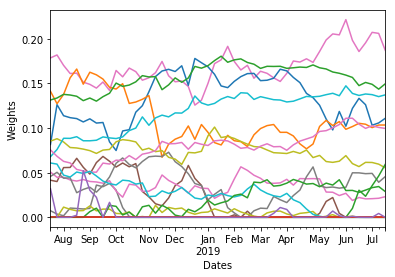

In [129]:
figure(figsize =(10,7),dpi=1200)
plt.savefig('weights.png')
mod_data.plot(x = 'Dates', y = ['3K1.SG', 'AKAM', 'BABA', 'BNFT', 'BOX', 'CONE', 'COR', 'COUP', 'CSOD',
       'DBX', 'DLR', 'EVBG', 'FOO.BE', 'GOOG', 'IBM', 'LOGM', 'MIME', 'MSFT',
       'NFLX', 'PAYC', 'PCTY', 'PFPT', 'PLAN', 'QLYS', 'QTS', 'RP', 
       'SHOP', 'SPSC',  'TWLO', 'TWOU', 'VNET', 
       'WDAY', 'WK', 'XRX', 'ZS'], legend = False)
plt.ylabel('Weights')
plt.show()


In [62]:
os.chdir('/home/rampage/Desktop')

In [138]:
os.chdir('C:\\Users\\upervaiz\\Desktop\\Portfolio')

In [37]:
#Getting Ajd Close for all the tickers
def close(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start = startdate, end = enddate)['Adj Close'])
    datas = map(data, tickers)
    return(pd.concat(datas, axis = 1))
    
dataset = close(tickers, start, end)
dataset.columns = tickers

#Cleaning data to remove all empty rows
all_data = dataset.dropna(axis = 0, thresh = 3)
all_data = all_data.fillna(method='bfill')

#mean and covariance
mu = expected_returns.mean_historical_return(all_data)
S = risk_models.sample_cov(all_data)

ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)

Expected annual return: 39.2%
Annual volatility: 14.4%
Sharpe Ratio: 2.59


(0.3916759274680828, 0.1437708513969626, 2.5851966783020317)

In [31]:
f_dat = pd.DataFrame(cleaned_weights, index=[0])
ret = ef.portfolio_performance(verbose=False)[0]
volt = ef.portfolio_performance(verbose=False)[1]
sharp = ef.portfolio_performance(verbose=False)[2]

f_dat['Return'] = ret
f_dat['Volatility'] = volt
f_dat['Sharpe.Ratio'] = sharp

In [50]:
close(tickers, start, end)

KeyError: 'Date'

In [58]:
t_period

['1/2/2014',
 '1/3/2014',
 '1/6/2014',
 '1/7/2014',
 '1/8/2014',
 '1/9/2014',
 '1/10/2014',
 '1/13/2014',
 '1/14/2014',
 '1/15/2014',
 '1/16/2014',
 '1/17/2014',
 '1/20/2014',
 '1/21/2014',
 '1/22/2014',
 '1/23/2014',
 '1/24/2014',
 '1/27/2014',
 '1/28/2014',
 '1/29/2014',
 '1/30/2014',
 '1/31/2014',
 '2/3/2014',
 '2/4/2014',
 '2/5/2014',
 '2/6/2014',
 '2/7/2014',
 '2/10/2014',
 '2/11/2014',
 '2/12/2014',
 '2/13/2014',
 '2/14/2014',
 '2/17/2014',
 '2/18/2014',
 '2/19/2014',
 '2/20/2014',
 '2/21/2014',
 '2/24/2014',
 '2/25/2014',
 '2/26/2014',
 '2/27/2014',
 '2/28/2014',
 '3/3/2014',
 '3/4/2014',
 '3/5/2014',
 '3/6/2014',
 '3/7/2014',
 '3/10/2014',
 '3/11/2014',
 '3/12/2014',
 '3/13/2014',
 '3/14/2014',
 '3/17/2014',
 '3/18/2014',
 '3/19/2014',
 '3/20/2014',
 '3/21/2014',
 '3/24/2014',
 '3/25/2014',
 '3/26/2014',
 '3/27/2014',
 '3/28/2014',
 '3/31/2014',
 '4/1/2014',
 '4/2/2014',
 '4/3/2014',
 '4/4/2014',
 '4/7/2014',
 '4/8/2014',
 '4/9/2014',
 '4/10/2014',
 '4/11/2014',
 '4/14/2014',
 

In [112]:
sam = t_period[1300:1303]
sam

['1/15/2019', '1/16/2019', '1/17/2019']

In [87]:
alldata

[             Adj Close  Adj Close  Adj Close   Adj Close   Adj Close  \
 Date                                                                   
 2014-01-02   27.929213  29.100000        NaN   48.979683   71.587410   
 2014-01-03   28.376911  29.020000        NaN   49.118313   71.455429   
 2014-01-06   28.288355  29.055000        NaN   48.841057   71.398880   
 2014-01-07   28.258835  29.200001        NaN   48.933479   72.643196   
 2014-01-08   28.160440  29.355000        NaN   48.979683   72.236870   
 2014-01-09   27.943972  29.305000        NaN   48.998177   72.416405   
 2014-01-10   28.288355  29.150000        NaN   48.979683   72.047859   
 2014-01-13   28.057127  28.695000        NaN   48.092503   70.885498   
 2014-01-14   28.298193  28.990000        NaN   48.462158   71.877762   
 2014-01-15   29.724909  28.900000        NaN   48.425194   72.558167   
 2014-01-16   29.764269  28.695000        NaN   48.554581   72.567627   
 2014-01-17   30.211962  28.625000        NaN   48.

In [86]:
alldata = []
for i in sam:
    end = datetime.datetime.strptime(i, '%m/%d/%Y')
    data = close(tickers,start, end)
    alldata.append(data)
    print(end)

2019-04-26 00:00:00
2019-04-29 00:00:00
2019-04-30 00:00:00
2019-05-01 00:00:00


KeyError: 'Date'

In [88]:
ta = []
for i in t_period:
    t= datetime.datetime.strptime(i, '%m/%d/%Y')
    ta.append(t)

In [89]:
ta

[datetime.datetime(2014, 1, 2, 0, 0),
 datetime.datetime(2014, 1, 3, 0, 0),
 datetime.datetime(2014, 1, 6, 0, 0),
 datetime.datetime(2014, 1, 7, 0, 0),
 datetime.datetime(2014, 1, 8, 0, 0),
 datetime.datetime(2014, 1, 9, 0, 0),
 datetime.datetime(2014, 1, 10, 0, 0),
 datetime.datetime(2014, 1, 13, 0, 0),
 datetime.datetime(2014, 1, 14, 0, 0),
 datetime.datetime(2014, 1, 15, 0, 0),
 datetime.datetime(2014, 1, 16, 0, 0),
 datetime.datetime(2014, 1, 17, 0, 0),
 datetime.datetime(2014, 1, 20, 0, 0),
 datetime.datetime(2014, 1, 21, 0, 0),
 datetime.datetime(2014, 1, 22, 0, 0),
 datetime.datetime(2014, 1, 23, 0, 0),
 datetime.datetime(2014, 1, 24, 0, 0),
 datetime.datetime(2014, 1, 27, 0, 0),
 datetime.datetime(2014, 1, 28, 0, 0),
 datetime.datetime(2014, 1, 29, 0, 0),
 datetime.datetime(2014, 1, 30, 0, 0),
 datetime.datetime(2014, 1, 31, 0, 0),
 datetime.datetime(2014, 2, 3, 0, 0),
 datetime.datetime(2014, 2, 4, 0, 0),
 datetime.datetime(2014, 2, 5, 0, 0),
 datetime.datetime(2014, 2, 6, 0, 

In [116]:
#Getting Ajd Close for all the tickers
for i in sam:
    end = datetime.datetime.strptime(i, '%m/%d/%Y')
    dataset = close(tickers, start, end)
    dataset.columns = tickers
    all_data = dataset.dropna(axis = 0, thresh = 3)
    all_data = all_data.fillna(method='bfill')

#mean and covariance
    mu = expected_returns.mean_historical_return(all_data)
    S = risk_models.sample_cov(all_data)

    raw_weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()
    
    f_dat = pd.DataFrame(cleaned_weights, index=[0])


    ret = ef.portfolio_performance(verbose=False)[0]
    vol = ef.portfolio_performance(verbose=False)[1]
    sharp = ef.portfolio_performance(verbose=False)[2]

    f_dat['Return'] = ret
    f_dat['Volatility'] = vol
    f_dat['Sharpe.Ratio'] = sharp
    
    print(f_dat)

    WDI.DE     FISV  FDC  FIS     INTU    SQ3.F     PYPL  ADYYF  GWRE  SSNC  \
0  0.02398  0.15538  0.0  0.0  0.04113  0.04025  0.00807    0.0   0.0   0.0   

   ...     MITK  ONDK  6172.T  ALFA.L   FSB.BE  GFT.DE  8207.HK    Return  \
0  ...  0.01974   0.0     0.0     0.0  0.06935     0.0      0.0  0.391676   

   Volatility  Sharpe.Ratio  
0    0.143771      2.585197  

[1 rows x 42 columns]
    WDI.DE     FISV  FDC  FIS     INTU    SQ3.F     PYPL  ADYYF  GWRE  SSNC  \
0  0.02398  0.15538  0.0  0.0  0.04113  0.04025  0.00807    0.0   0.0   0.0   

   ...     MITK  ONDK  6172.T  ALFA.L   FSB.BE  GFT.DE  8207.HK    Return  \
0  ...  0.01974   0.0     0.0     0.0  0.06935     0.0      0.0  0.391676   

   Volatility  Sharpe.Ratio  
0    0.143771      2.585197  

[1 rows x 42 columns]
    WDI.DE     FISV  FDC  FIS     INTU    SQ3.F     PYPL  ADYYF  GWRE  SSNC  \
0  0.02398  0.15538  0.0  0.0  0.04113  0.04025  0.00807    0.0   0.0   0.0   

   ...     MITK  ONDK  6172.T  ALFA.L   FSB.BE 

In [113]:
#Getting Ajd Close for all the tickers
for i in sam:
    end = datetime.datetime.strptime(i, '%m/%d/%Y')
    dataset = close(tickers, start, end)
    dataset.columns = tickers
    all_data = dataset.dropna(axis = 0, thresh = 3)
    all_data = all_data.fillna(method='bfill')

#mean and covariance
    mu = expected_returns.mean_historical_return(all_data)
    S = risk_models.sample_cov(all_data)

    raw_weights = ef.max_sharpe()
    cleaned_weights = ef.clean_weights()
    
    f_dat = pd.DataFrame(cleaned_weights, index=[0])


    ret = ef.portfolio_performance(verbose=False)[0]
    vol = ef.portfolio_performance(verbose=False)[1]
    sharp = ef.portfolio_performance(verbose=False)[2]

    f_dat['Return'] = ret
    f_dat['Volatility'] = vol
    f_dat['Sharpe.Ratio'] = sharp
    
    print(f_dat)

    WDI.DE     FISV  FDC  FIS     INTU    SQ3.F     PYPL  ADYYF  GWRE  SSNC  \
0  0.02398  0.15538  0.0  0.0  0.04113  0.04025  0.00807    0.0   0.0   0.0   

   ...     MITK  ONDK  6172.T  ALFA.L   FSB.BE  GFT.DE  8207.HK    Return  \
0  ...  0.01974   0.0     0.0     0.0  0.06935     0.0      0.0  0.391676   

   Volatility  Sharpe.Ratio  
0    0.143771      2.585197  

[1 rows x 42 columns]
    WDI.DE     FISV  FDC  FIS     INTU    SQ3.F     PYPL  ADYYF  GWRE  SSNC  \
0  0.02398  0.15538  0.0  0.0  0.04113  0.04025  0.00807    0.0   0.0   0.0   

   ...     MITK  ONDK  6172.T  ALFA.L   FSB.BE  GFT.DE  8207.HK    Return  \
0  ...  0.01974   0.0     0.0     0.0  0.06935     0.0      0.0  0.391676   

   Volatility  Sharpe.Ratio  
0    0.143771      2.585197  

[1 rows x 42 columns]
    WDI.DE     FISV  FDC  FIS     INTU    SQ3.F     PYPL  ADYYF  GWRE  SSNC  \
0  0.02398  0.15538  0.0  0.0  0.04113  0.04025  0.00807    0.0   0.0   0.0   

   ...     MITK  ONDK  6172.T  ALFA.L   FSB.BE 

In [129]:
f_dat.to_csv('new.csv', row =2)

TypeError: to_csv() got an unexpected keyword argument 'row'

In [199]:
t_period = pd.to_datetime(t_period).dt.date.unique().tolist()

[datetime.date(2014, 1, 2),
 datetime.date(2014, 1, 3),
 datetime.date(2014, 1, 6),
 datetime.date(2014, 1, 7),
 datetime.date(2014, 1, 8),
 datetime.date(2014, 1, 9),
 datetime.date(2014, 1, 10),
 datetime.date(2014, 1, 13),
 datetime.date(2014, 1, 14),
 datetime.date(2014, 1, 15),
 datetime.date(2014, 1, 16),
 datetime.date(2014, 1, 17),
 datetime.date(2014, 1, 20),
 datetime.date(2014, 1, 21),
 datetime.date(2014, 1, 22),
 datetime.date(2014, 1, 23),
 datetime.date(2014, 1, 24),
 datetime.date(2014, 1, 27),
 datetime.date(2014, 1, 28),
 datetime.date(2014, 1, 29),
 datetime.date(2014, 1, 30),
 datetime.date(2014, 1, 31),
 datetime.date(2014, 2, 3),
 datetime.date(2014, 2, 4),
 datetime.date(2014, 2, 5),
 datetime.date(2014, 2, 6),
 datetime.date(2014, 2, 7),
 datetime.date(2014, 2, 10),
 datetime.date(2014, 2, 11),
 datetime.date(2014, 2, 12),
 datetime.date(2014, 2, 13),
 datetime.date(2014, 2, 14),
 datetime.date(2014, 2, 17),
 datetime.date(2014, 2, 18),
 datetime.date(2014, 2, 1

In [202]:
samp = t_period[0:4]

In [203]:
samp

[datetime.date(2014, 1, 2),
 datetime.date(2014, 1, 3),
 datetime.date(2014, 1, 6),
 datetime.date(2014, 1, 7)]

In [175]:
import time
from datetime import datetime
timestamp = int(time.mktime(t_period.timetuple()))

TypeError: 'NoneType' object is not callable

In [173]:
for i in t_period:
    end = datetime.datetime(i)
print(end)

TypeError: an integer is required (got type Timestamp)

In [86]:
f_dat

,COUP,PLAN,SHOP,AKAM,XRX,DLR,PAYC,PFPT,PCTY,RP,...,TWOU,COR,BNFT,VNET,QTS,IBM,3K1.SG,Return,Volatility,Sharpe.Ratio
0,0.0,0.05929,0.09959,0.0,0.0,0.1109,0.13718,0.0,0.0,0.0,...,0.0,0.18713,0.0,0.0,0.0,0.0,0.0,0.373092,0.172724,2.044251


In [15]:
t_period

0      2014-01-02
1      2014-01-03
2      2014-01-06
3      2014-01-07
4      2014-01-08
5      2014-01-09
6      2014-01-10
7      2014-01-13
8      2014-01-14
9      2014-01-15
10     2014-01-16
11     2014-01-17
12     2014-01-20
13     2014-01-21
14     2014-01-22
15     2014-01-23
16     2014-01-24
17     2014-01-27
18     2014-01-28
19     2014-01-29
20     2014-01-30
21     2014-01-31
22     2014-02-03
23     2014-02-04
24     2014-02-05
25     2014-02-06
26     2014-02-07
27     2014-02-10
28     2014-02-11
29     2014-02-12
          ...    
1629   2019-05-28
1630   2019-05-29
1631   2019-05-30
1632   2019-05-31
1633   2019-06-03
1634   2019-06-04
1635   2019-06-05
1636   2019-06-06
1637   2019-06-07
1638   2019-06-09
1639   2019-06-10
1640   2019-06-11
1641   2019-06-12
1642   2019-06-13
1643   2019-06-14
1644   2019-06-16
1645   2019-06-17
1646   2019-06-18
1647   2019-06-19
1648   2019-06-20
1649   2019-06-21
1650   2019-06-23
1651   2019-06-24
1652   2019-06-25
1653   201

In [52]:
workbook = xlsxwriter.Workbook('weights.xlsx')
worksheet = workbook.add_worksheet()
row = 0
col = 0

for i, v in cleaned_weights:
    worksheet.write(row, col, i)
    worksheet.write(row, col +1, v)
    row +=1

ValueError: too many values to unpack (expected 2)

In [61]:
cleaned_weights

{'WDI.DE': 0.01601,
 'FISV': 0.13606,
 'FDC': 0.0,
 'FIS': 0.0,
 'INTU': 0.04134,
 'SQ3.F': 0.03989,
 'PYPL': 0.00788,
 'ADYYF': 0.0,
 'GWRE': 0.0,
 'SSNC': 0.0,
 'BKI': 0.0,
 'TEMN.SW': 0.08951,
 'PAGS': 0.0,
 '0XE.F': 0.04244,
 'TREE': 0.0,
 'AFTPF': 0.08351,
 'HQY': 0.01624,
 'SIM.CO': 0.02176,
 'ENV': 0.0,
 'STNE': 0.0,
 'VIRT': 0.03851,
 'EPAY': 0.0,
 'HYQ.DE': 0.12714,
 'BRF.HM': 0.0,
 'BCOR': 0.0,
 'LC': 0.0,
 'YRD': 0.0,
 'FDP.L': 0.05508,
 'YRR.F': 0.08441,
 'GSKY': 0.0,
 'LEON.SW': 0.0,
 'PPH.NZ': 0.10132,
 'MITK': 0.02358,
 'ONDK': 0.0,
 '6172.T': 0.0,
 'ALFA.L': 0.0,
 'FSB.BE': 0.07526,
 'GFT.DE': 0.0,
 '8207.HK': 0.0}

In [17]:
#mean and covariance
mu = expected_returns.mean_historical_return(all_data)
S = risk_models.sample_cov(all_data)

In [36]:
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

{'WDI.DE': 0.01601, 'FISV': 0.13606, 'FDC': 0.0, 'FIS': 0.0, 'INTU': 0.04134, 'SQ3.F': 0.03989, 'PYPL': 0.00788, 'ADYYF': 0.0, 'GWRE': 0.0, 'SSNC': 0.0, 'BKI': 0.0, 'TEMN.SW': 0.08951, 'PAGS': 0.0, '0XE.F': 0.04244, 'TREE': 0.0, 'AFTPF': 0.08351, 'HQY': 0.01624, 'SIM.CO': 0.02176, 'ENV': 0.0, 'STNE': 0.0, 'VIRT': 0.03851, 'EPAY': 0.0, 'HYQ.DE': 0.12714, 'BRF.HM': 0.0, 'BCOR': 0.0, 'LC': 0.0, 'YRD': 0.0, 'FDP.L': 0.05508, 'YRR.F': 0.08441, 'GSKY': 0.0, 'LEON.SW': 0.0, 'PPH.NZ': 0.10132, 'MITK': 0.02358, 'ONDK': 0.0, '6172.T': 0.0, 'ALFA.L': 0.0, 'FSB.BE': 0.07526, 'GFT.DE': 0.0, '8207.HK': 0.0}
Expected annual return: 39.1%
Annual volatility: 14.1%
Sharpe Ratio: 2.63


(0.39054647956530697, 0.141152305597809, 2.6251535743321126)